In [1]:
import rasterio
import numpy as np
from rasterio.plot import show
import matplotlib.pyplot as plt

In [2]:
riverImage = rasterio.open('../Data/Rst/riverImage2.tif')

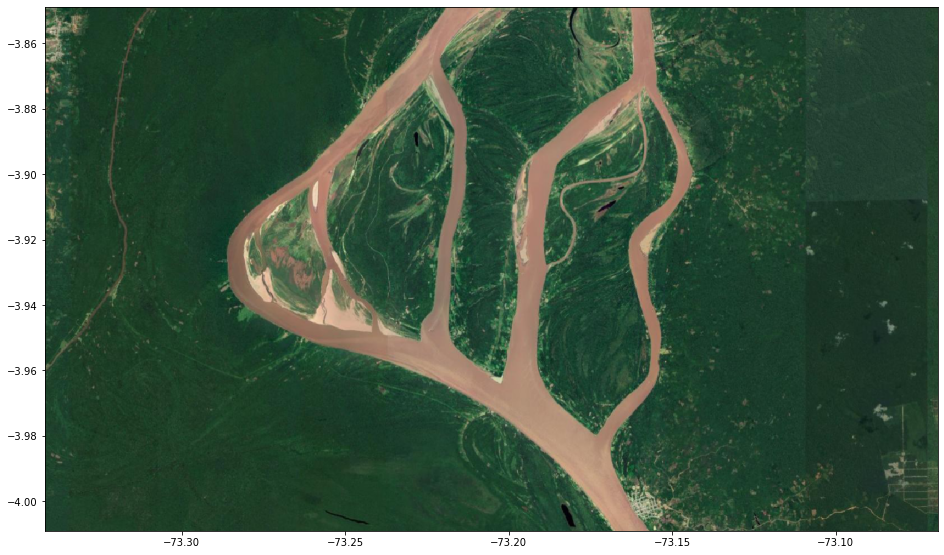

<AxesSubplot:>

In [3]:
fig, ax = plt.subplots(figsize=(16,12))
show(riverImage)

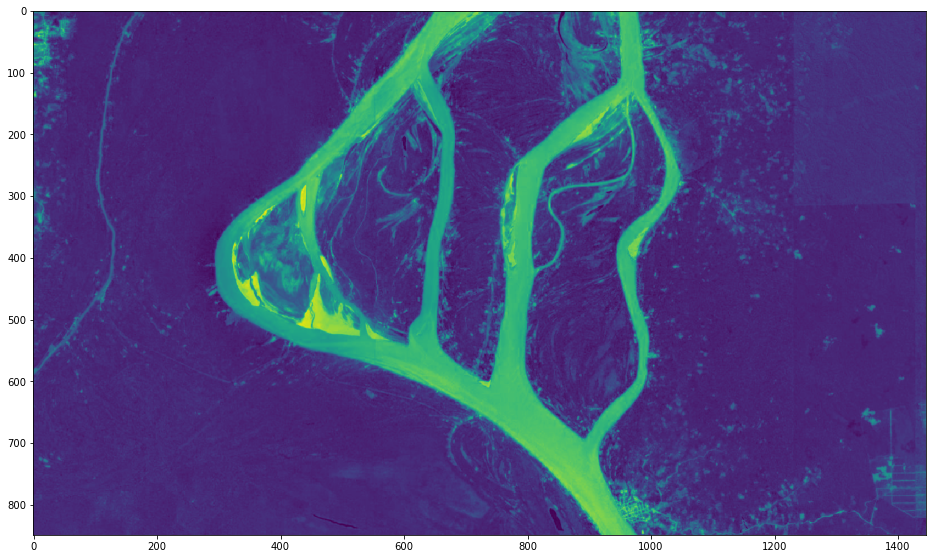

In [4]:
redBand, greenBand, blueBand = riverImage.read(1), riverImage.read(2), riverImage.read(3)

#change data type
redBand = np.float32(redBand)
greenBand = np.float32(greenBand)
blueBand = np.float32(blueBand)

fig, ax = plt.subplots(figsize=(16,12))
plt.imshow(redBand)

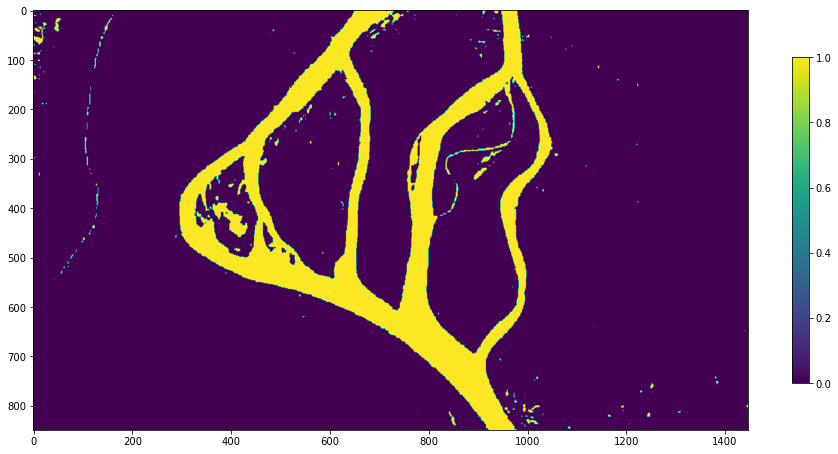

In [5]:
#calculate hatariIndex
hatariIndex = np.zeros(blueBand.shape)

hatariIndex[ (redBand > greenBand)] = 1
fig, ax = plt.subplots(figsize=(16,12))
plt.imshow(hatariIndex)
plt.colorbar(shrink=0.5)

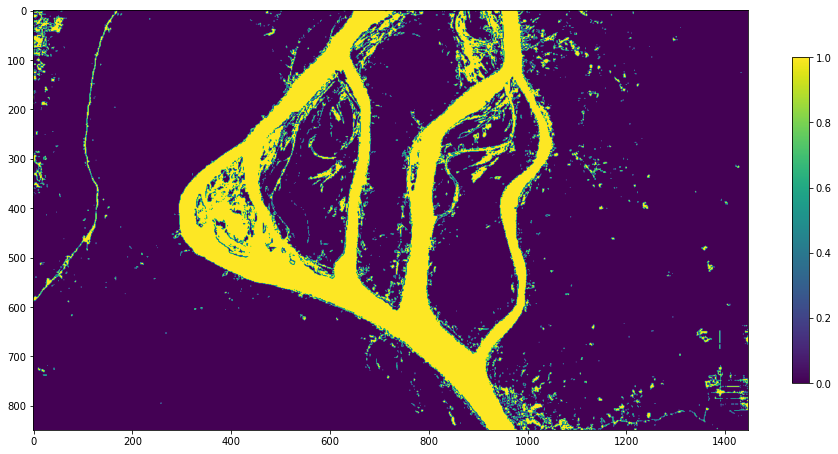

In [6]:
#calculate hatariIndex
hatariIndex = np.zeros(blueBand.shape)

hatariIndex[ (redBand > greenBand) |  (redBand > 70) & (redBand < 120)] = 1
fig, ax = plt.subplots(figsize=(16,12))
plt.imshow(hatariIndex)
plt.colorbar(shrink=0.5)

In [7]:
#calculate hatariIndex
hatariIndex = np.zeros(blueBand.shape)

hatariIndex[ (redBand > greenBand)] = 1

In [8]:
from rasterio.features import shapes

hatariIndex = hatariIndex.astype('float32')

In [9]:
#polygonize de rasterio
#shapes?

In [10]:
riverShape = shapes(hatariIndex)

#print one coordinate
for river in riverShape:
    print(river)
    break

({'type': 'Polygon', 'coordinates': [[(2.0, 0.0), (2.0, 1.0), (3.0, 1.0), (3.0, 2.0), (6.0, 2.0), (6.0, 1.0), (8.0, 1.0), (8.0, 0.0), (2.0, 0.0)]]}, 1.0)


In [11]:
#glcImage.xy?

In [12]:
def transformPoint(pair):
    lonlatPair = riverImage.xy(pair[1],pair[0])
    return lonlatPair

In [13]:
#test transformation
riverShape = shapes(hatariIndex)

#print one coordinate
for river in riverShape:
    print(river[0]['coordinates'])
    coordList = [transformPoint(pair) for pair in river[0]['coordinates'][0]]
    print(coordList)
    break

[[(2.0, 0.0), (2.0, 1.0), (3.0, 1.0), (3.0, 2.0), (6.0, 2.0), (6.0, 1.0), (8.0, 1.0), (8.0, 0.0), (2.0, 0.0)]]
[(-73.34135979564661, -3.848812947665282), (-73.34135979564661, -3.8490017674066372), (-73.34117097590526, -3.8490017674066372), (-73.34117097590526, -3.849190587147993), (-73.34060451668118, -3.849190587147993), (-73.34060451668118, -3.8490017674066372), (-73.34022687719848, -3.8490017674066372), (-73.34022687719848, -3.848812947665282), (-73.34135979564661, -3.848812947665282)]


In [14]:
import fiona

#create line shapefile
riverShape = shapes(hatariIndex)

# define schema
schema = {
    'geometry':'LineString',
    'properties':[('ID','int')]
}

#open a fiona object
lineShp = fiona.open('../Data/Shp/riverLine.shp', mode='w', driver='ESRI Shapefile',
          schema = schema, crs = "EPSG:4326")

#print one coordinate
i=0
for river in riverShape:
    coords = river[0]['coordinates'][0]
    
    if len(coords) > 15:
        coordList = [transformPoint(pair) for pair in coords]

        rowDict = {
                    'geometry' : {'type':'LineString',
                                     'coordinates': coordList},
                    'properties': {'ID' : i},
                    }
        lineShp.write(rowDict)
        i+=1

lineShp.close()